# COGS 189 Find Triggers

In [1]:
import numpy as np   
import matplotlib.pyplot as plt    
import pandas as pd

# from scipy.io.wavfile import read

import os
# import mne

# import wave
# import sys
from scipy.signal import find_peaks

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

// This disables scrolling outputs

<IPython.core.display.Javascript object>

# Import data for one subject
Combine data from all subjects for a selected experiment into a single data frame.

In [3]:
from glob import glob

# Specify experiment folder to read from
exp = 'exp0'

# Subject ID here essentially selects a data file from the folder
subject_ID = 0

# Grab all data files for that experiment
data_files = glob("../data/" + exp + "/**/OpenBCI*.txt", recursive=True)

# Get one file (corresponding to one subject)
file_path = data_files[subject_ID]
print(f'Subject{subject_ID}')
print(f'Reading {file_path}')

# Read in one subject's data
data = pd.read_csv(file_path,
                   delimiter = ',', # BrainFlow files appear to use \t
                   header=4, # row number of col names
                  )

# Display
data

Subject0
Reading ../data/exp0/OpenBCISession_2023-03-01_13-30-42/OpenBCI-RAW-2023-03-01_13-43-06.txt


,Sample Index,EXG Channel 0,EXG Channel 1,EXG Channel 2,EXG Channel 3,EXG Channel 4,EXG Channel 5,EXG Channel 6,EXG Channel 7,Accel Channel 0,...,Other.3,Other.4,Other.5,Other.6,Analog Channel 0,Analog Channel 1,Analog Channel 2,Timestamp,Other.7,Timestamp (Formatted)
0,1.0,12584.725032,15524.024132,-2317.138292,17950.261289,14667.952319,7234.834997,18205.361748,19735.338656,0.0,...,2.0,109.0,1.0,255.0,421.0,621.0,511.0,1.677707e+09,0.0,2023-03-01 13:43:06.580
1,2.0,12595.587980,15529.410902,-2316.959478,17958.352620,14691.756927,7232.622174,18216.045882,19740.792482,0.0,...,2.0,4.0,1.0,255.0,402.0,516.0,511.0,1.677707e+09,0.0,2023-03-01 13:43:06.580
2,3.0,12579.830000,15523.957077,-2315.327801,17950.641269,14672.221502,7231.638698,18202.008987,19733.751682,0.0,...,1.0,189.0,1.0,255.0,387.0,445.0,511.0,1.677707e+09,0.0,2023-03-01 13:43:06.580
3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,3.0,0.0,1.0,255.0,445.0,768.0,511.0,1.677707e+09,0.0,2023-03-01 13:43:06.669
4,1.0,12535.305325,15492.910503,-2324.290851,17940.381818,14577.673623,7226.006058,18228.495804,19714.976217,0.0,...,2.0,110.0,1.0,255.0,423.0,622.0,511.0,1.677707e+09,0.0,2023-03-01 13:43:06.678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201703,228.0,13771.110925,14851.169568,-4500.881374,20286.398564,18994.043051,6362.066431,19783.484314,20563.046105,0.0,...,0.0,248.0,1.0,255.0,319.0,248.0,511.0,1.677708e+09,0.0,2023-03-01 13:56:32.471
201704,229.0,13106.638265,14606.037987,-4437.536530,19796.493029,17391.780602,6199.926877,18912.615646,19904.049623,0.0,...,0.0,248.0,1.0,255.0,319.0,248.0,511.0,1.677708e+09,0.0,2023-03-01 13:56:32.471
201705,230.0,13205.947066,14598.796022,-4461.385842,19756.997497,17268.086048,6227.017191,18917.823603,19923.540345,0.0,...,0.0,247.0,1.0,255.0,318.0,247.0,511.0,1.677708e+09,0.0,2023-03-01 13:56:32.476
201706,231.0,13902.829755,14849.157911,-4528.843406,20233.268468,18854.501111,6398.410368,19811.669864,20595.634949,0.0,...,0.0,246.0,1.0,255.0,317.0,246.0,511.0,1.677708e+09,0.0,2023-03-01 13:56:32.484


# Simplify Column Names

In [4]:
print(data.keys())

# Remove extra spaces from col names, and remove "Channel" as its redundant
# https://stackoverflow.com/questions/21606987/how-can-i-strip-the-whitespace-from-pandas-dataframe-headers
data = data.rename(columns=lambda x: x.strip().replace(" Channel ", ""))

print(data.keys())

Index(['Sample Index', ' EXG Channel 0', ' EXG Channel 1', ' EXG Channel 2',
       ' EXG Channel 3', ' EXG Channel 4', ' EXG Channel 5', ' EXG Channel 6',
       ' EXG Channel 7', ' Accel Channel 0', ' Accel Channel 1',
       ' Accel Channel 2', ' Other', ' Other.1', ' Other.2', ' Other.3',
       ' Other.4', ' Other.5', ' Other.6', ' Analog Channel 0',
       ' Analog Channel 1', ' Analog Channel 2', ' Timestamp', ' Other.7',
       ' Timestamp (Formatted)'],
      dtype='object')
Index(['Sample Index', 'EXG0', 'EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6',
       'EXG7', 'Accel0', 'Accel1', 'Accel2', 'Other', 'Other.1', 'Other.2',
       'Other.3', 'Other.4', 'Other.5', 'Other.6', 'Analog0', 'Analog1',
       'Analog2', 'Timestamp', 'Other.7', 'Timestamp (Formatted)'],
      dtype='object')


# Drop unused columns

In [5]:
# data = data.drop(columns=['temp', 'time0'])
#data = data.drop(columns=['temp', 'time0', 'time1'])

drop_cols = [] # list of column labels to drop
for col in data.keys():
    # print(col)
    if 'Other' in col:
        drop_cols.append(col)
    elif 'Accel' in col:
        drop_cols.append(col)
    elif 'Timestamp (Formatted)' in col:
        drop_cols.append(col)
    elif 'Sample Index' in col: # keeps wrapping between 0-255, not sure how to use
        drop_cols.append(col)
        
print('Columns to drop:', drop_cols)

# Remove 
data = data.drop(columns=drop_cols)

print('Remaining cols:\n', data.keys())

Columns to drop: ['Sample Index', 'Accel0', 'Accel1', 'Accel2', 'Other', 'Other.1', 'Other.2', 'Other.3', 'Other.4', 'Other.5', 'Other.6', 'Other.7', 'Timestamp (Formatted)']
Remaining cols:
 Index(['EXG0', 'EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7',
       'Analog0', 'Analog1', 'Analog2', 'Timestamp'],
      dtype='object')


# Plot Analog (Aux) Channels

Analog0 Min: 289.0
Analog0 Max: 341.0
Analog1 Min: 238.0
Analog1 Max: 257.0
Analog2 Min: 286.0
Analog2 Max: 755.0


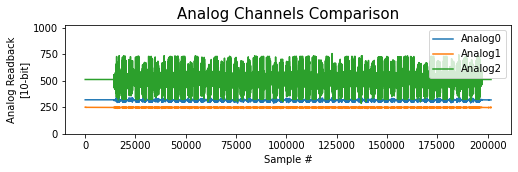

In [6]:
START_NDX = 100 # why skip initial samples?

# Make a figure to plot all analog data
plt.figure(figsize=(8,2))

for col in data.keys():
    if 'Analog' in col:
        print(f"{col} Min: {data[col][START_NDX:].min()}")
        print(f"{col} Max: {data[col][START_NDX:].max()}")
        
        # add a plot for this channel
        plt.plot(data[col][START_NDX:], label=col)


plt.title("Analog Channels Comparison", fontsize=15)
plt.legend(loc="upper right")
plt.xlabel('Sample #')
plt.ylabel('Analog Readback\n[10-bit]')
plt.ylim([0, 1023])
plt.show()

# Attempt to find the starting sample of the experiment

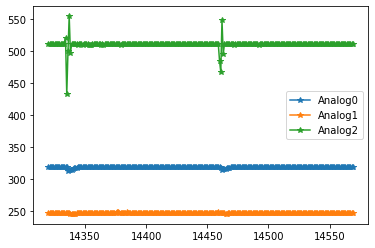

In [7]:
TARGET_NDX = 14320 # leave some room to prevent overlapping peaks
DURATION_NDX = 250*1

for ch in range(3):
    ch_name = f'Analog{ch}'
    ch_data = data[ch_name].iloc[TARGET_NDX:TARGET_NDX + DURATION_NDX]
    plt.plot(ch_data, '*-', label=ch_name)
    
plt.legend()

# Add triggers to a stim channel

Trigger | Description
:-- | :--
0 | nothing
1 | trial start (loud cue)
2 | loud cue
3 | soft cue
X | auto-assigned by stim wave used

## Import PsychoPy Logs

In [8]:
# Get the directory containing the current dataframe's data
subject_dir = '/'.join(file_path.split('/')[:-1])

# Grab all data files for that experiment
psychopy_csv_path = glob(subject_dir + "/psychopy_data/*.csv", recursive=True)[0]

print(f'Reading {psychopy_csv_path}...')

# Read in one subject's data
psychopy_data = pd.read_csv(psychopy_csv_path,
                            delimiter = ',', # BrainFlow files appear to use \t
                            # header=4, # row number of col names
                           )

psychopy_data.keys()

Reading ../data/exp0/OpenBCISession_2023-03-01_13-30-42/psychopy_data/amy_untitled_2023-03-01_13h43.30.272.csv...


Index(['stimuli_name', 'trials_2.thisRepN', 'trials_2.thisTrialN',
       'trials_2.thisN', 'trials_2.thisIndex', 'trials.thisRepN',
       'trials.thisTrialN', 'trials.thisN', 'trials.thisIndex',
       'Introduction.started', 'listen_instr.started', 'key_continue.started',
       'Introduction.stopped', 'key_continue.keys', 'key_continue.rt',
       'cross.started', 'cue.started', 'cross_listen.started', 'beat1.started',
       'cue.stopped', 'Instruction_next_trial.started', 'beat1.stopped',
       'Instruction_next_trial.stopped', 'cross_listen.stopped', 'participant',
       'session', 'date', 'expName', 'psychopyVersion', 'frameRate',
       'Unnamed: 30'],
      dtype='object')

## Assign event (trigger) labels based on stimuli files used

In [9]:
stim_labels = {}
stim_paths = psychopy_data['stimuli_name'].dropna().unique()
stim_paths.sort()

label = 10 # arbitrary, label>=10 would represent some stim file here
for stim_path in stim_paths:
    stim_labels[stim_path] = label
    label += 1
    
stim_labels

{'audio/exp0/kick_iso.wav': 10,
 'audio/exp0/kick_mp1.wav': 11,
 'audio/exp0/kick_mp2.wav': 12,
 'audio/exp0/snare_iso.wav': 13,
 'audio/exp0/snare_mp1.wav': 14,
 'audio/exp0/snare_mp2.wav': 15}

In [10]:
psychopy_data[['stimuli_name', 'beat1.started']]

,stimuli_name,beat1.started
0,NaN,NaN
1,audio/exp0/snare_iso.wav,52.711941
2,audio/exp0/kick_mp2.wav,65.724129
3,audio/exp0/snare_mp2.wav,78.712668
4,audio/exp0/kick_mp1.wav,91.723607
...,...,...
65,audio/exp0/kick_mp2.wav,767.723208
66,audio/exp0/kick_mp1.wav,780.722425
67,audio/exp0/snare_mp2.wav,793.721969
68,audio/exp0/snare_mp1.wav,813.121061


## Get order of stim files from PsychoPy dump

In [11]:
stim_labels_ordered = []
stim_files_ordered = []
for stim_file in psychopy_data['stimuli_name'].dropna():
    
    label = stim_labels[stim_file]
    stim_labels_ordered.append(label)
    stim_files_ordered.append(stim_file)
    print(label, stim_file)


13 audio/exp0/snare_iso.wav
12 audio/exp0/kick_mp2.wav
15 audio/exp0/snare_mp2.wav
11 audio/exp0/kick_mp1.wav
14 audio/exp0/snare_mp1.wav
10 audio/exp0/kick_iso.wav
14 audio/exp0/snare_mp1.wav
15 audio/exp0/snare_mp2.wav
12 audio/exp0/kick_mp2.wav
11 audio/exp0/kick_mp1.wav
10 audio/exp0/kick_iso.wav
13 audio/exp0/snare_iso.wav
12 audio/exp0/kick_mp2.wav
15 audio/exp0/snare_mp2.wav
14 audio/exp0/snare_mp1.wav
10 audio/exp0/kick_iso.wav
13 audio/exp0/snare_iso.wav
11 audio/exp0/kick_mp1.wav
13 audio/exp0/snare_iso.wav
15 audio/exp0/snare_mp2.wav
14 audio/exp0/snare_mp1.wav
11 audio/exp0/kick_mp1.wav
12 audio/exp0/kick_mp2.wav
10 audio/exp0/kick_iso.wav
13 audio/exp0/snare_iso.wav
15 audio/exp0/snare_mp2.wav
14 audio/exp0/snare_mp1.wav
10 audio/exp0/kick_iso.wav
12 audio/exp0/kick_mp2.wav
11 audio/exp0/kick_mp1.wav
11 audio/exp0/kick_mp1.wav
13 audio/exp0/snare_iso.wav
12 audio/exp0/kick_mp2.wav
15 audio/exp0/snare_mp2.wav
14 audio/exp0/snare_mp1.wav
10 audio/exp0/kick_iso.wav
12 audio/e

## Find peaks in aux channel and assign trigger labels

Trial Period [samples]: 3254
#Trials: 56
Cue Peaks [indices]: [ 15 141 265 392 516 642 766 893]
Drum Peaks [indices]: [1006 1131 1258 1381 1508 1637 1758 1882 2013 2132 2257 2385 2510 2632
 2766 2883]


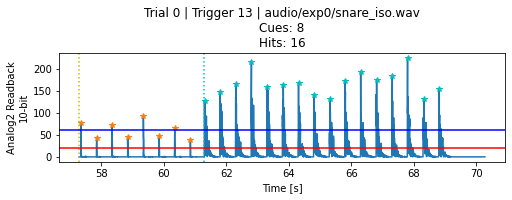

Cue Peaks [indices]: [ 12 137 262 387 513 638 763 888]
Drum Peaks [indices]: [1010 1073 1198 1389 1448 1577 1636 1761 2015 2074 2199 2387 2453 2578
 2637 2766]


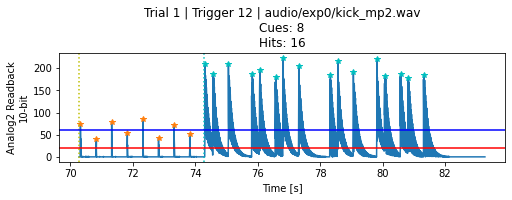

Cue Peaks [indices]: [ 15 141 265 391 515 640 765 890]
Drum Peaks [indices]: [1005 1073 1198 1389 1449 1572 1634 1756 2009 2071 2198 2387 2449 2581
 2636 2761]


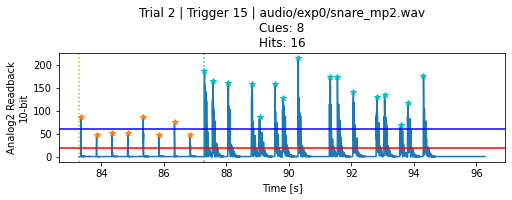

Cue Peaks [indices]: [ 16 141 267 391 518 642 769 892]
Drum Peaks [indices]: [1009 1197 1263 1385 1576 1635 1698 1823 2014 2202 2261 2386 2574 2640
 2699 2828]


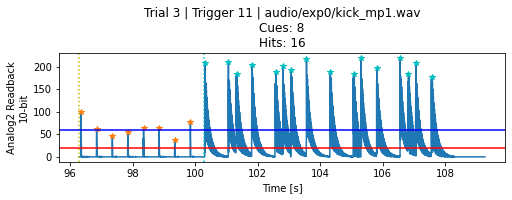

Cue Peaks [indices]: [ 16 142 266 392 516 643 767 893]
Drum Peaks [indices]: [1021 1201 1271 1384 1573 1635 1699 1833 2019 2201 2268 2393 2576 2641
 2711 2825]


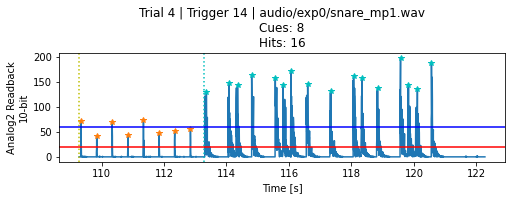

Cue Peaks [indices]: [ 10 135 262 386 511 636 762 887]
Drum Peaks [indices]: [1010 1139 1264 1386 1511 1636 1761 1890 2015 2137 2262 2387 2512 2641
 2766 2888]


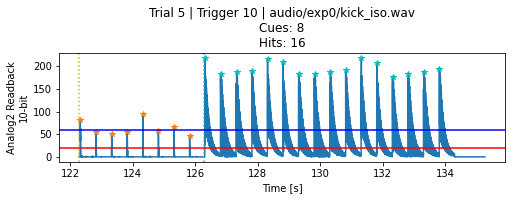

Cue Peaks [indices]: [ 17 143 267 393 518 644 768 894]
Drum Peaks [indices]: [1012 1200 1261 1391 1574 1638 1702 1830 2024 2209 2265 2391 2580 2637
 2700 2838]


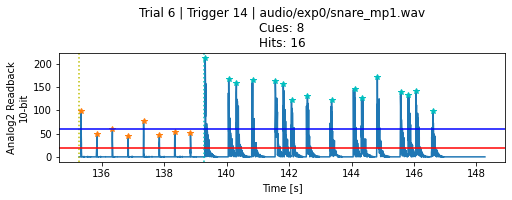

Cue Peaks [indices]: [ 13 139 265 389 514 639 766 890]
Drum Peaks [indices]: [1020 1078 1200 1386 1449 1575 1640 1763 2011 2084 2200 2389 2449 2576
 2637 2766]


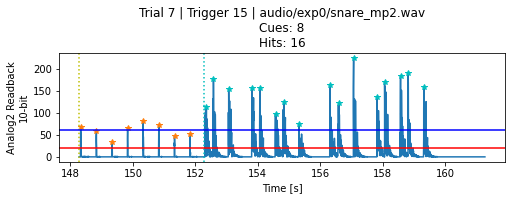

Cue Peaks [indices]: [ 16 140 265 390 515 641 766 891]
Drum Peaks [indices]: [1015 1074 1203 1387 1450 1575 1641 1766 2013 2079 2201 2392 2451 2576
 2639 2764]


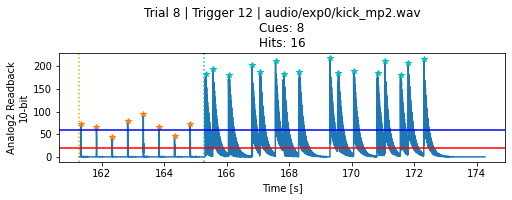

Cue Peaks [indices]: [ 15 140 266 391 517 642 766 892]
Drum Peaks [indices]: [1012 1200 1266 1391 1579 1638 1704 1826 2017 2205 2264 2389 2577 2643
 2702 2827]


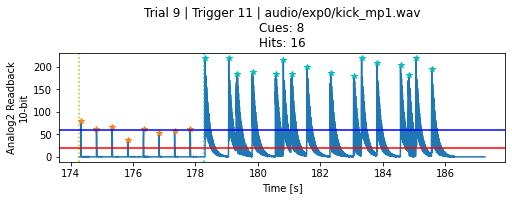

Cue Peaks [indices]: [ 16 143 266 392 516 642 767 892]
Drum Peaks [indices]: [1016 1138 1263 1388 1517 1642 1764 1889 2014 2143 2268 2393 2515 2640
 2765 2894]


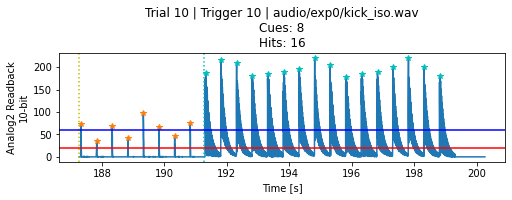

Cue Peaks [indices]: [ 16 143 267 392 518 642 769 892]
Drum Peaks [indices]: [1020 1139 1268 1388 1523 1644 1767 1893 2013 2139 2266 2389 2517 2646
 2766 2892]


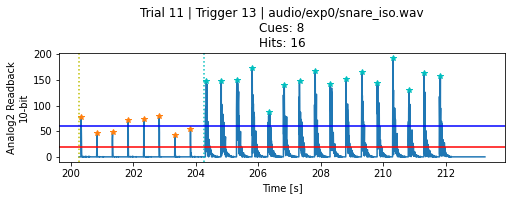

Cue Peaks [indices]: [ 19 144 270 395 520 645 771 895]
Drum Peaks [indices]: [1017 1080 1205 1393 1452 1577 1643 1765 2015 2078 2203 2394 2457 2582
 2641 2766]


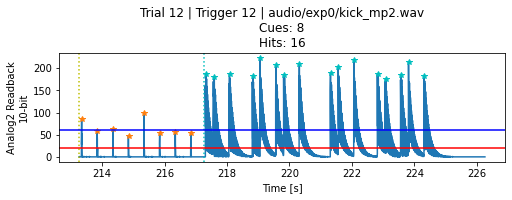

Cue Peaks [indices]: [ 17 143 268 393 518 643 768 895]
Drum Peaks [indices]: [1014 1076 1204 1391 1452 1575 1647 1769 2017 2083 2206 2394 2456 2578
 2645 2768]


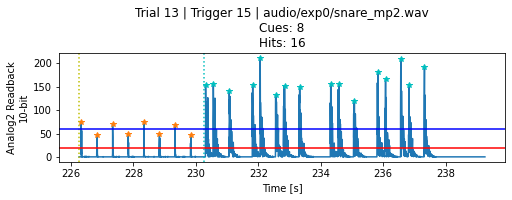

Cue Peaks [indices]: [ 20 144 270 394 519 644 770 895]
Drum Peaks [indices]: [1024 1201 1265 1403 1581 1641 1709 1834 2015 2205 2272 2396 2585 2645
 2707 2830]


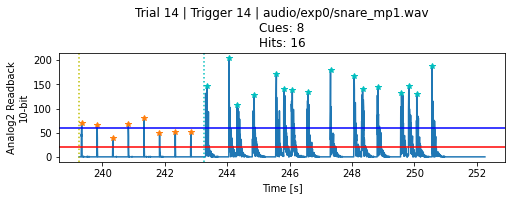

Cue Peaks [indices]: [ 18 145 269 394 519 644 769 895]
Drum Peaks [indices]: [1014 1139 1268 1393 1515 1640 1765 1890 2019 2144 2266 2391 2516 2645
 2770 2895]


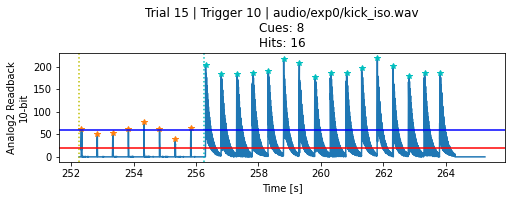

Cue Peaks [indices]: [ 19 144 269 394 520 644 769 894]
Drum Peaks [indices]: [1025 1140 1272 1392 1514 1646 1766 1894 2021 2151 2274 2398 2515 2640
 2767 2893]


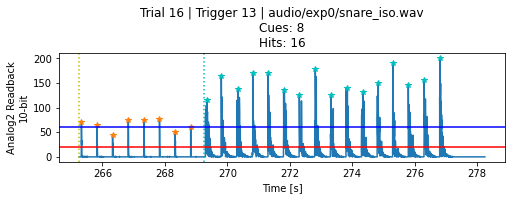

Cue Peaks [indices]: [ 18 144 268 394 519 644 770 894]
Drum Peaks [indices]: [1019 1207 1266 1395 1579 1645 1704 1833 2017 2205 2271 2396 2584 2643
 2709 2831]


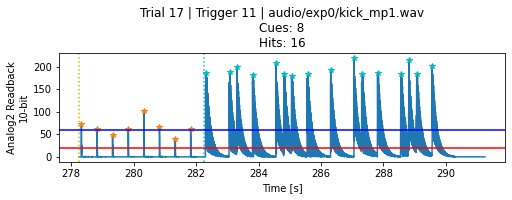

Cue Peaks [indices]: [ 22 149 273 399 523 648 773 899]
Drum Peaks [indices]: [1015 1152 1270 1395 1521 1651 1769 1891 2029 2142 2276 2396 2521 2651
 2776 2894]


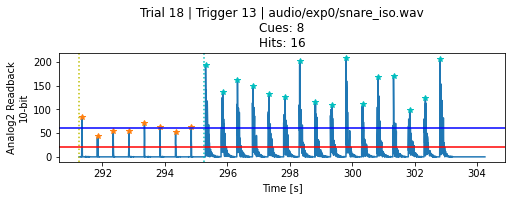

Cue Peaks [indices]: [ 19 146 269 396 521 645 770 895]
Drum Peaks [indices]: [1018 1083 1212 1392 1457 1580 1645 1769 2028 2079 2207 2393 2457 2579
 2642 2778]


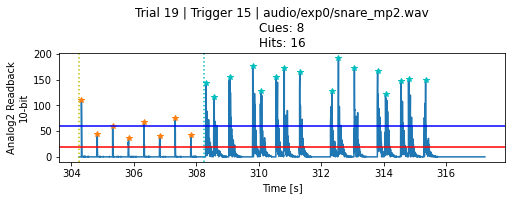

Cue Peaks [indices]: [ 21 145 271 395 520 645 771 896]
Drum Peaks [indices]: [1019 1203 1270 1400 1583 1650 1704 1832 2016 2207 2268 2393 2581 2646
 2710 2837]


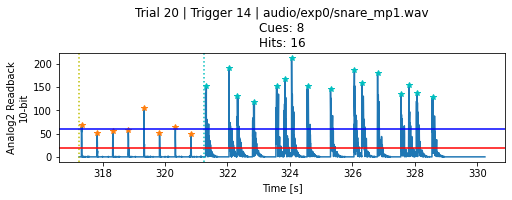

Cue Peaks [indices]: [ 20 146 270 396 521 646 771 896]
Drum Peaks [indices]: [1017 1205 1271 1396 1584 1643 1709 1834 2022 2206 2269 2394 2582 2648
 2707 2832]


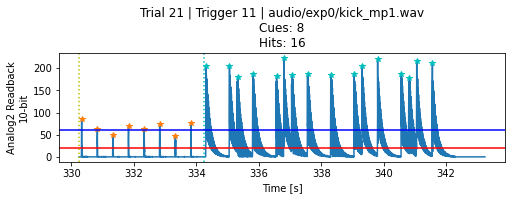

Cue Peaks [indices]: [ 22 146 271 396 521 648 772 898]
Drum Peaks [indices]: [1021 1080 1209 1393 1459 1581 1647 1772 2019 2085 2210 2398 2457 2582
 2645 2770]


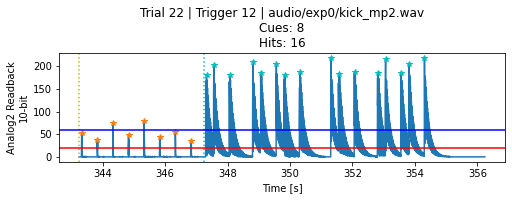

Cue Peaks [indices]: [ 21 146 273 397 522 647 773 897]
Drum Peaks [indices]: [1018 1147 1272 1397 1519 1644 1769 1898 2023 2148 2270 2395 2520 2649
 2774 2899]


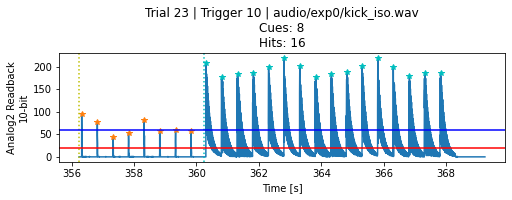

Cue Peaks [indices]: [ 23 148 273 400 525 649 774 899]
Drum Peaks [indices]: [1021 1143 1269 1395 1524 1652 1771 1900 2019 2143 2269 2398 2522 2654
 2775 2897]


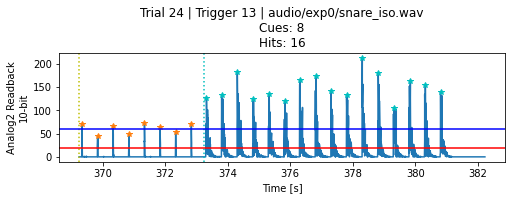

Cue Peaks [indices]: [ 21 147 272 397 522 647 773 898]
Drum Peaks [indices]: [1023 1082 1213 1397 1460 1580 1645 1771 2021 2085 2210 2397 2459 2589
 2651 2769]


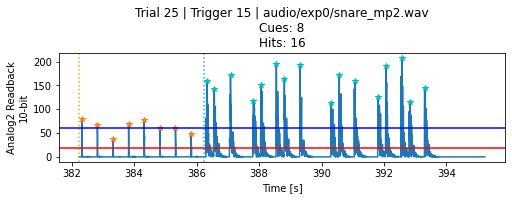

Cue Peaks [indices]: [ 23 147 273 397 524 648 774 898]
Drum Peaks [indices]: [1021 1210 1272 1393 1581 1646 1718 1834 2019 2213 2270 2399 2585 2646
 2708 2841]


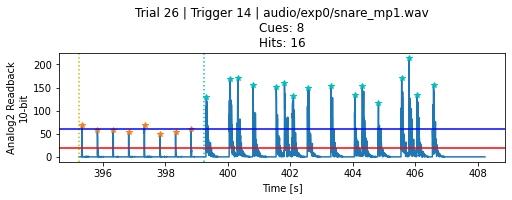

Cue Peaks [indices]: [ 24 149 274 399 524 650 777 900]
Drum Peaks [indices]: [1022 1144 1269 1394 1519 1648 1773 1895 2020 2145 2274 2399 2524 2646
 2771 2896]


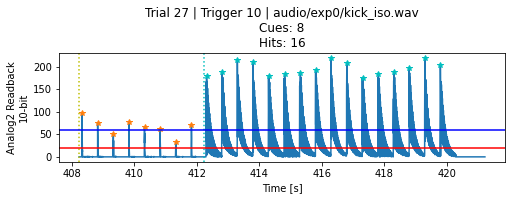

Cue Peaks [indices]: [ 23 150 274 400 524 650 774 900]
Drum Peaks [indices]: [1023 1086 1211 1399 1458 1583 1649 1771 2021 2084 2209 2400 2459 2588
 2647 2772]


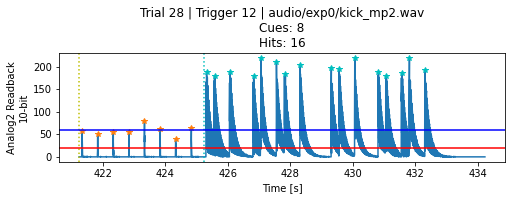

Cue Peaks [indices]: [ 24 149 274 399 524 649 775 899]
Drum Peaks [indices]: [1020 1208 1274 1396 1587 1646 1709 1834 2025 2213 2272 2397 2585 2651
 2710 2839]


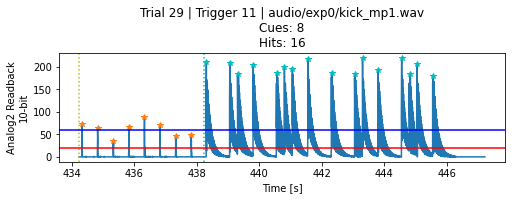

Cue Peaks [indices]: [ 27 153 277 403 527 653 778 903]
Drum Peaks [indices]: [1020 1208 1274 1399 1587 1646 1712 1837 2025 2209 2272 2397 2588 2647
 2710 2835]


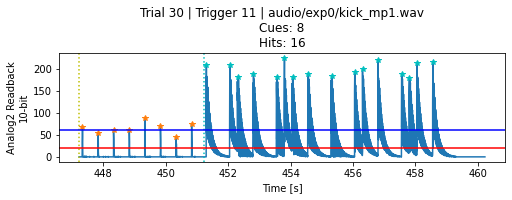

Cue Peaks [indices]: [ 24 151 275 401 525 650 775 902]
Drum Peaks [indices]: [1032 1158 1269 1397 1528 1645 1774 1896 2020 2148 2280 2402 2522 2652
 2792 2914]


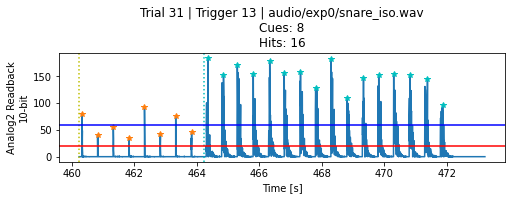

Cue Peaks [indices]: [ 24 150 274 401 525 651 775 902]
Drum Peaks [indices]: [1024 1087 1212 1400 1459 1584 1647 1772 2022 2085 2210 2398 2464 2589
 2648 2773]


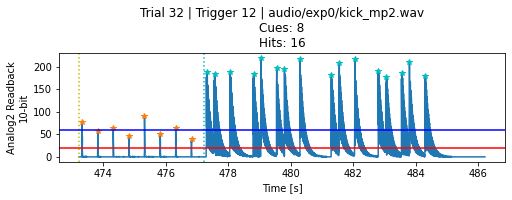

Cue Peaks [indices]: [ 24 149 276 400 525 650 775 901]
Drum Peaks [indices]: [1022 1084 1214 1401 1467 1585 1656 1777 2025 2087 2217 2400 2460 2597
 2651 2774]


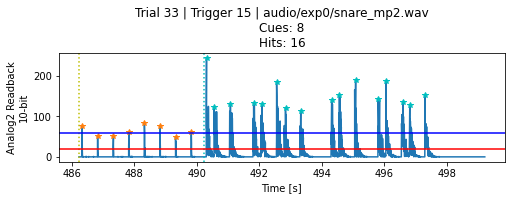

Cue Peaks [indices]: [ 25 151 275 400 525 650 776 901]
Drum Peaks [indices]: [1022 1214 1272 1398 1588 1647 1714 1837 2026 2214 2274 2405 2588 2651
 2712 2835]


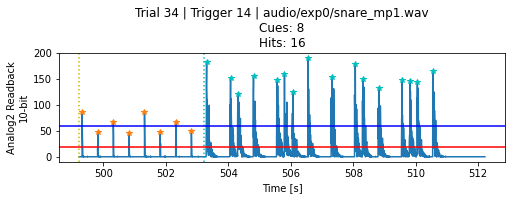

Cue Peaks [indices]: [ 25 150 275 400 525 651 777 901]
Drum Peaks [indices]: [1021 1150 1275 1400 1522 1647 1772 1901 2026 2151 2273 2398 2523 2652
 2777 2902]


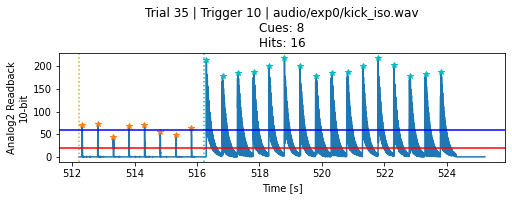

Cue Peaks [indices]: [ 27 152 277 402 527 652 779 903]
Drum Peaks [indices]: [1021 1084 1209 1397 1463 1588 1647 1776 2023 2089 2214 2398 2461 2586
 2652 2777]


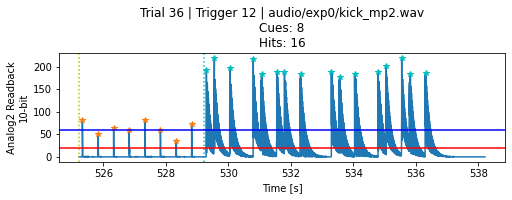

Cue Peaks [indices]: [ 25 150 275 401 525 652 776 901]
Drum Peaks [indices]: [1026 1149 1275 1398 1522 1647 1770 1896 2024 2147 2275 2410 2523 2647
 2777 2897]


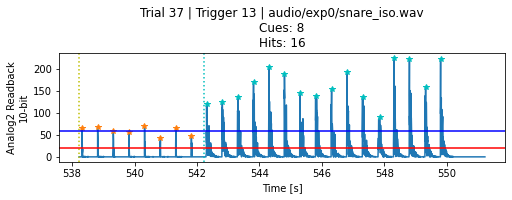

Cue Peaks [indices]: [ 25 151 275 402 525 651 776 901]
Drum Peaks [indices]: [1021 1210 1279 1402 1589 1648 1712 1841 2022 2209 2277 2401 2593 2652
 2710 2848]


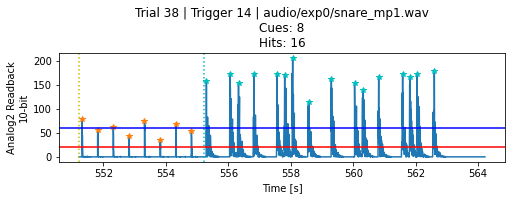

Cue Peaks [indices]: [ 25 150 277 400 527 651 776 901]
Drum Peaks [indices]: [1024 1094 1213 1399 1458 1594 1646 1774 2023 2086 2209 2411 2463 2590
 2651 2779]


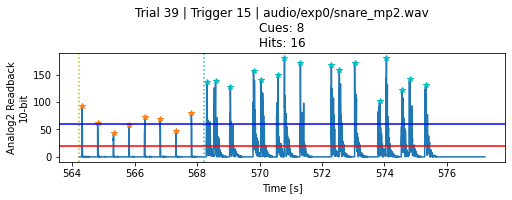

Cue Peaks [indices]: [ 25 151 275 400 525 650 776 901]
Drum Peaks [indices]: [1025 1150 1272 1397 1522 1651 1776 1898 2023 2148 2273 2402 2527 2652
 2774 2899]


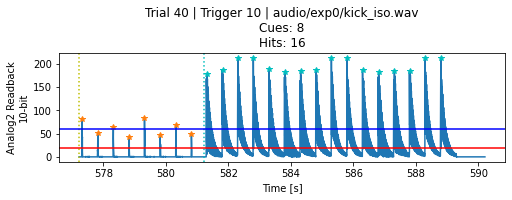

Cue Peaks [indices]: [ 26 152 277 403 528 653 777 904]
Drum Peaks [indices]: [1025 1213 1272 1401 1585 1648 1714 1839 2023 2211 2277 2399 2590 2649
 2715 2837]


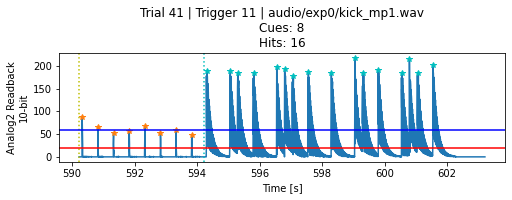

Cue Peaks [indices]: [ 32 157 282 407 533 658 784 908]
Drum Peaks [indices]: [1022 1094 1211 1396 1461 1596 1653 1778 2024 2086 2212 2402 2466 2585
 2648 2775]


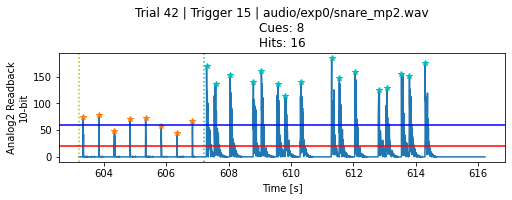

Cue Peaks [indices]: [ 27 151 276 402 526 652 777 903]
Drum Peaks [indices]: [1026 1148 1273 1398 1527 1652 1777 1899 2024 2149 2278 2403 2528 2650
 2775 2900]


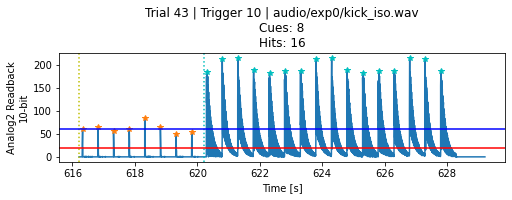

Cue Peaks [indices]: [ 26 151 276 403 528 653 777 904]
Drum Peaks [indices]: [1023 1211 1277 1402 1590 1649 1715 1837 2028 2212 2275 2400 2588 2654
 2713 2838]


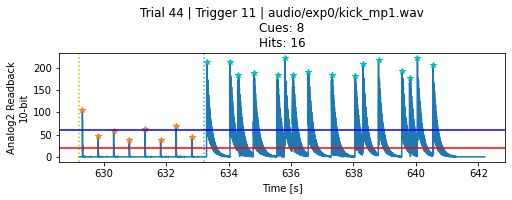

Cue Peaks [indices]: [ 28 152 278 403 528 653 778 905]
Drum Peaks [indices]: [1027 1090 1215 1403 1469 1594 1653 1782 2032 2091 2220 2404 2467 2592
 2658 2783]


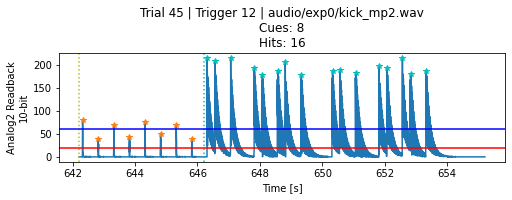

Cue Peaks [indices]: [ 28 153 278 403 529 654 780 904]
Drum Peaks [indices]: [1026 1154 1275 1407 1524 1649 1776 1907 2024 2151 2280 2413 2533 2650
 2776 2905]


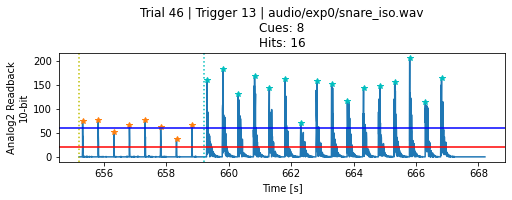

Cue Peaks [indices]: [ 32 158 282 408 532 658 782 908]
Drum Peaks [indices]: [1033 1216 1281 1402 1592 1663 1717 1847 2032 2218 2286 2405 2594 2663
 2717 2843]


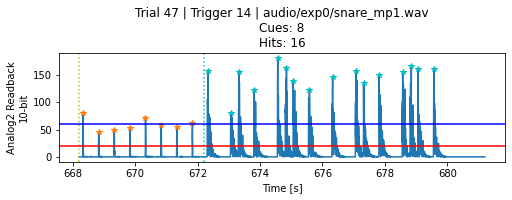

Cue Peaks [indices]: [ 35 160 285 411 535 662 786 911]
Drum Peaks [indices]: [1032 1095 1220 1408 1467 1592 1658 1780 2030 2093 2218 2409 2468 2597
 2656 2781]


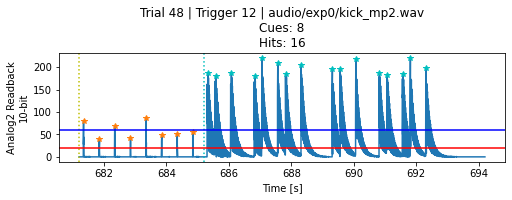

Cue Peaks [indices]: [ 32 157 283 408 533 658 783 908]
Drum Peaks [indices]: [1023 1086 1211 1402 1464 1587 1655 1778 2033 2101 2216 2405 2464 2591
 2652 2779]


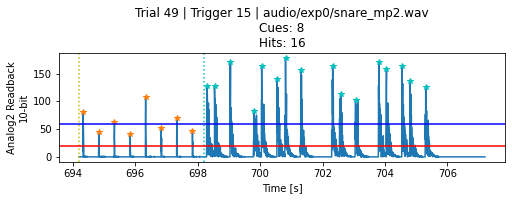

Cue Peaks [indices]: [ 32 157 282 408 532 659 783 910]
Drum Peaks [indices]: [1032 1154 1279 1408 1533 1658 1780 1905 2030 2159 2284 2409 2531 2656
 2781 2910]


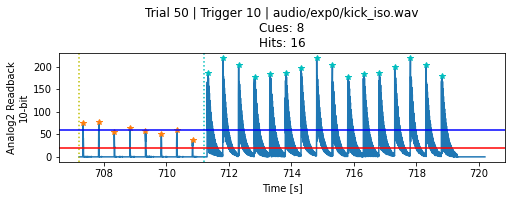

Cue Peaks [indices]: [ 33 157 284 408 533 658 783 908]
Drum Peaks [indices]: [1034 1220 1290 1410 1597 1655 1727 1844 2031 2223 2282 2407 2596 2665
 2724 2853]


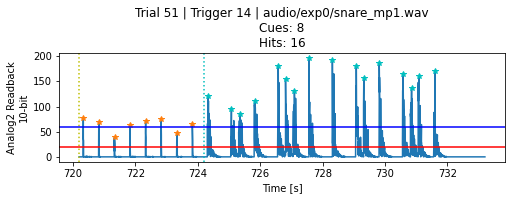

Cue Peaks [indices]: [ 34 158 284 408 534 658 785 909]
Drum Peaks [indices]: [1029 1159 1278 1415 1533 1664 1788 1918 2050 2156 2285 2410 2543 2662
 2781 2910]


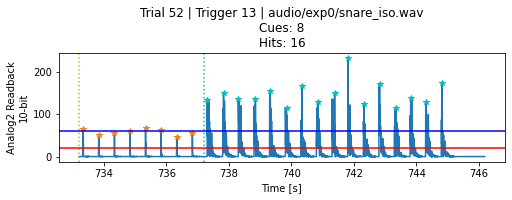

Cue Peaks [indices]: [ 33 158 284 408 535 659 784 909]
Drum Peaks [indices]: [1033 1221 1280 1409 1593 1656 1722 1847 2031 2219 2285 2410 2598 2657
 2723 2845]


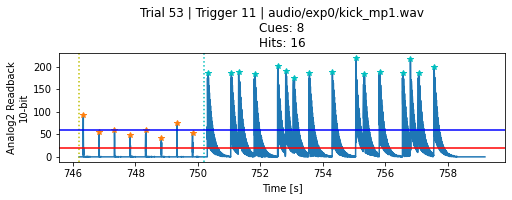

Cue Peaks [indices]: [ 32 157 282 407 533 658 783 908]
Drum Peaks [indices]: [1028 1158 1282 1413 1531 1664 1784 1912 2033 2166 2283 2407 2540 2660
 2786 2917]


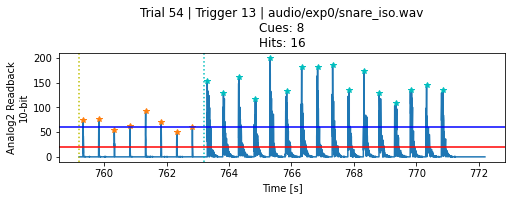

Cue Peaks [indices]: [ 30 155 282 405 532 656 781 906]
Drum Peaks [indices]: [1033 1096 1221 1409 1468 1593 1659 1781 2031 2094 2219 2410 2469 2598
 2657 2782]


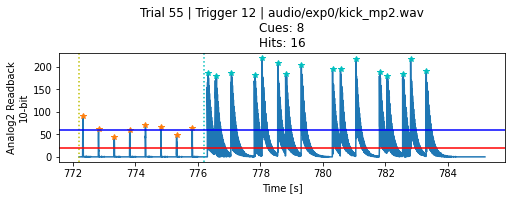

In [12]:
# Find onsets (peaks)
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html

# Cyton params
FS_EEG = 250

# PsychoPy params
NUM_CONDITIONS = 2 # kick vs snare
NUM_SYNCOPATIONS = 3 # iso, mp1, mp2
NUM_REPS = 10

CUE_DUR = 4 # seconds
DRUMS_DUR = 8 # seconds
WAIT_DUR = 1 # second
LAG_EST = 4/FS_EEG # seconds
# There seems to be an extra lag with every trial.
# The cue peaks keep sliding forward if LAG_EST is 0.
# 5 is too much

# Hand-tuned peak finding params
CUE_HEIGHT = 20
DRUMS_HEIGHT = 60
IOI_CUE = 0.2 * FS_EEG
IOI_DRUMS = 0.2 * FS_EEG

# Calculated params
period = int(FS_EEG*(CUE_DUR + DRUMS_DUR + WAIT_DUR + LAG_EST))
print('Trial Period [samples]:', period)

num_trials = 56 # NUM_CONDITIONS * NUM_SYNCOPATIONS * NUM_REPS
print('#Trials:', num_trials)

START_NDX = int(TARGET_NDX) # make a copy of the exp start index eyeballed above

stim_channel = [0]*len(data)

for trial in range(num_trials):
    
    # Get sample times (how accurate are these?)
    t = data['Timestamp'].iloc[START_NDX:START_NDX + period]
    t = np.array(t) # make a numpy copy
    t -= data['Timestamp'].iloc[0] # start at t=0 

    # Get corresponding aux channel with audio
    analog2 = data['Analog2'].iloc[START_NDX:START_NDX + period]
    analog2 = np.array(analog2)
    analog2 = analog2 - analog2.mean()
    analog2 = np.abs(analog2) # in case we miss a negative peak

    # Look for peaks in the cue segment
    cue = np.copy(analog2[:FS_EEG*CUE_DUR]) # first four seconds is the metronome
    peaks_cue, _ = find_peaks(
        cue, # only use one of the two channels
        height=CUE_HEIGHT, # the smaller metronome blips also exceed 0.5
        distance=IOI_CUE, # look for a peak in every 100ms, since events would happen every 0.5s @120bpm
    )
    
    # Look for peaks in the drum segment
    drums = np.copy(analog2[FS_EEG*CUE_DUR:])
    peaks_drums, _ = find_peaks(
        drums, # only use one of the two channels
        height=DRUMS_HEIGHT, # the smaller metronome blips also exceed 0.5
        distance=IOI_DRUMS, # look for a peak in every 100ms, since events would happen every 0.5s @120bpm
    )
    
    peaks_drums += FS_EEG*CUE_DUR # offset by start time
    
    # Collect peaks
    peaks = []
    peaks.extend(peaks_cue)
    peaks.extend(peaks_drums)
    
    print('Cue Peaks [indices]:', peaks_cue)
    print('Drum Peaks [indices]:', peaks_drums)
    
    # Plot peaks for cue
    plt.figure(figsize=(8,2))
    plt.plot(t, analog2, '-')
    plt.plot(t[peaks_cue], analog2[peaks_cue], '*')
    plt.plot(t[peaks_drums], analog2[peaks_drums], 'c*')
    plt.axvline(x=t[0], c='y', linestyle=':')
    plt.axvline(x=t[0] + CUE_DUR, c='c', linestyle=':')
    plt.axhline(y=CUE_HEIGHT, c='r')
    plt.axhline(y=DRUMS_HEIGHT, c='b')
    
    trigger_label = stim_labels_ordered[trial]
    stim_file = stim_files_ordered[trial]
    title_str = f'Trial {trial} | Trigger {trigger_label} | {stim_file}'
    title_str += f'\nCues: {len(peaks_cue)}\nHits: {len(peaks_drums)}'
    plt.title(title_str)
    plt.xlabel('Time [s]')
    plt.ylabel('Analog2 Readback\n10-bit')
    plt.show()
    
    # Add trigger labels
    p_onset = peaks_cue[0] + START_NDX
    stim_channel[p_onset] = 1 # 1 for trial start (loud cue)
    
    p_onset = peaks_cue[4] + START_NDX
    stim_channel[p_onset] = 2 # 2 for loud cue
    
    soft_cues = [1, 2, 3, 5, 6, 7]
    for p in peaks_cue[soft_cues]:
        p_onset = p + START_NDX
        stim_channel[p_onset] = 3 # 3 for soft cue
    
    for p in peaks_drums:
        p_onset = p + START_NDX
        stim_channel[p_onset] = trigger_label
        
    # update for next trial
    START_NDX += period
    
data['stim'] = stim_channel # make a stim channel

<AxesSubplot: >

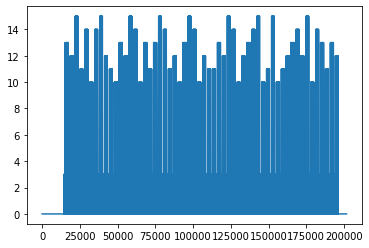

In [13]:
data['stim'].plot()

In [14]:
data.keys()

Index(['EXG0', 'EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7',
       'Analog0', 'Analog1', 'Analog2', 'Timestamp', 'stim'],
      dtype='object')

# Write dataframe out

In [15]:
filname = f'{exp}_sub{subject_ID}_8ch_1stim.csv'
data.to_csv(filname)